In [415]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.decomposition import PCA
#from sklearn.cross_decomposition import PLSRegression, PLSSVD
import xgboost as xgb
import glob
#from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Solution to 1(a) as below:

In [126]:
com=pd.read_csv('/Users/sharadsharma/Downloads/Homework4Data/communities.csv',names=['state',
'county',
'community',
'communityname',
'fold',
'population',
'householdsize',
'racepctblack',
'racePctWhite',
'racePctAsian',
'racePctHisp',
'agePct12t21',
'agePct12t29',
'agePct16t24',
'agePct65up',
'numbUrban',
'pctUrban',
'medIncome',
'pctWWage',
'pctWFarmSelf',
'pctWInvInc',
'pctWSocSec',
'pctWPubAsst',
'pctWRetire',
'medFamInc',
'perCapInc',
'whitePerCap',
'blackPerCap',
'indianPerCap',
'AsianPerCap',
'OtherPerCap',
'HispPerCap',
'NumUnderPov',
'PctPopUnderPov',
'PctLess9thGrade',
'PctNotHSGrad',
'PctBSorMore',
'PctUnemployed',
'PctEmploy',
'PctEmplManu',
'PctEmplProfServ',
'PctOccupManu',
'PctOccupMgmtProf',
'MalePctDivorce',
'MalePctNevMarr',
'FemalePctDiv',
'TotalPctDiv',
'PersPerFam',
'PctFam2Par',
'PctKids2Par',
'PctYoungKids2Par',
'PctTeen2Par',
'PctWorkMomYoungKids',
'PctWorkMom',
'NumIlleg',
'PctIlleg',
'NumImmig',
'PctImmigRecent',
'PctImmigRec5',
'PctImmigRec8',
'PctImmigRec10',
'PctRecentImmig',
'PctRecImmig5',
'PctRecImmig8',
'PctRecImmig10',
'PctSpeakEnglOnly',
'PctNotSpeakEnglWell',
'PctLargHouseFam',
'PctLargHouseOccup',
'PersPerOccupHous',
'PersPerOwnOccHous',
'PersPerRentOccHous',
'PctPersOwnOccup',
'PctPersDenseHous',
'PctHousLess3BR',
'MedNumBR',
'HousVacant',
'PctHousOccup',
'PctHousOwnOcc',
'PctVacantBoarded',
'PctVacMore6Mos',
'MedYrHousBuilt',
'PctHousNoPhone',
'PctWOFullPlumb',
'OwnOccLowQuart',
'OwnOccMedVal',
'OwnOccHiQuart',
'RentLowQ',
'RentMedian',
'RentHighQ',
'MedRent',
'MedRentPctHousInc',
'MedOwnCostPctInc',
'MedOwnCostPctIncNoMtg',
'NumInShelters',
'NumStreet',
'PctForeignBorn',
'PctBornSameState',
'PctSameHouse85',
'PctSameCity85',
'PctSameState85',
'LemasSwornFT',
'LemasSwFTPerPop',
'LemasSwFTFieldOps',
'LemasSwFTFieldPerPop',
'LemasTotalReq',
'LemasTotReqPerPop',
'PolicReqPerOffic',
'PolicPerPop',
'RacialMatchCommPol',
'PctPolicWhite',
'PctPolicBlack',
'PctPolicHisp',
'PctPolicAsian',
'PctPolicMinor',
'OfficAssgnDrugUnits',
'NumKindsDrugsSeiz',
'PolicAveOTWorked',
'LandArea',
'PopDens',
'PctUsePubTrans',
'PolicCars',
'PolicOperBudg',
'LemasPctPolicOnPatr',
'LemasGangUnitDeploy',
'LemasPctOfficDrugUn',
'PolicBudgPerPop',
'ViolentCrimesPerPop',
])

In [127]:
com.head(5)

state county community        communityname  fold  population  \
0      8      ?         ?         Lakewoodcity     1        0.19   
1     53      ?         ?          Tukwilacity     1        0.00   
2     24      ?         ?         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0           0.33          0.02          0.90          0.12  ...      0.12   
1           0.16          0.12          0.74          0.45  ...      0.02   
2           0.42          0.49          0.56          0.17  ...      0.01   
3           0.77          1.00          0.08          0.12  ...      0.02   
4           0.55          0.02          0.95          0.09  ...      0.04   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20       0.06           0.04                  0.9   
1     0.12            0.45          ?              ?                    ?   
2     0.21            0.02          ?              ?                    ?   
3     0.39            0.28          ?              ?                    ?   
4     0.09            0.02          ?              ?                    ?   

   LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                  0.5                 0.32             0.14   
1                    ?                 0.00                ?   
2                    ?                 0.00                ?   
3                    ?                 0.00                ?   
4                    ?                 0.00                ?   

   ViolentCrimesPerPop  
0                 0.20  
1                 0.67  
2                 0.43  
3                 0.12  
4                 0.03  

[5 rows x 128 columns]

In [128]:
com.shape

(1994, 128)

In [129]:
train_com= com.iloc[:1495,:]

In [130]:
train_com.head(5)

state county community        communityname  fold  population  \
0      8      ?         ?         Lakewoodcity     1        0.19   
1     53      ?         ?          Tukwilacity     1        0.00   
2     24      ?         ?         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0           0.33          0.02          0.90          0.12  ...      0.12   
1           0.16          0.12          0.74          0.45  ...      0.02   
2           0.42          0.49          0.56          0.17  ...      0.01   
3           0.77          1.00          0.08          0.12  ...      0.02   
4           0.55          0.02          0.95          0.09  ...      0.04   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20       0.06           0.04                  0.9   
1     0.12            0.45          ?              ?                    ?   
2     0.21            0.02          ?              ?                    ?   
3     0.39            0.28          ?              ?                    ?   
4     0.09            0.02          ?              ?                    ?   

   LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                  0.5                 0.32             0.14   
1                    ?                 0.00                ?   
2                    ?                 0.00                ?   
3                    ?                 0.00                ?   
4                    ?                 0.00                ?   

   ViolentCrimesPerPop  
0                 0.20  
1                 0.67  
2                 0.43  
3                 0.12  
4                 0.03  

[5 rows x 128 columns]

In [131]:
train_com.shape

(1495, 128)

In [132]:
test_com=com.iloc[1495:,:]

In [133]:
test_com.head(5)

state county community   communityname  fold  population  householdsize  \
1495      6      ?         ?  MillValleycity     8        0.00           0.20   
1496     48      ?         ?     LiveOakcity     8        0.00           0.55   
1497     35      ?         ?    Portalescity     8        0.00           0.52   
1498     42     17     25112   Fallstownship     8        0.04           0.51   
1499     51    683     48952    Manassascity     8        0.03           0.59   

      racepctblack  racePctWhite  racePctAsian  ...  LandArea  PopDens  \
1495          0.03          0.91          0.23  ...      0.01     0.23   
1496          0.13          0.78          0.15  ...      0.01     0.18   
1497          0.04          0.59          0.05  ...      0.01     0.18   
1498          0.07          0.92          0.09  ...      0.06     0.13   
1499          0.20          0.75          0.19  ...      0.03     0.23   

      PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
1495            0.73          ?              ?                    ?   
1496            0.02          ?              ?                    ?   
1497            0.00          ?              ?                    ?   
1498            0.16          ?              ?                    ?   
1499            0.06          ?              ?                    ?   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
1495                    ?                  0.0                ?   
1496                    ?                  0.0                ?   
1497                    ?                  0.0                ?   
1498                    ?                  0.0                ?   
1499                    ?                  0.0                ?   

      ViolentCrimesPerPop  
1495                 0.12  
1496                 0.11  
1497                 0.12  
1498                 0.06  
1499                 0.12  

[5 rows x 128 columns]

In [134]:
test_com.shape

(499, 128)

### Solution to 1(b) as below:

Let us first remove the 5 non-predictive features which are 'state','county','community','communityname','fold'.

In [135]:
del com['state']
del com['county']
del com['community']
del com['communityname']
del com['fold']

In [136]:
com.head(3)

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0         0.17         0.34         0.47         0.29        0.32  ...   
1         0.07         0.26         0.59         0.35        0.27  ...   
2         0.04         0.39         0.47         0.28        0.32  ...   

   LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0      0.12     0.26            0.20       0.06           0.04   
1      0.02     0.12            0.45          ?              ?   
2      0.01     0.21            0.02          ?              ?   

   LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                  0.9                  0.5                 0.32   
1                    ?                    ?                 0.00   
2                    ?                    ?                 0.00   

   PolicBudgPerPop  ViolentCrimesPerPop  
0             0.14                 0.20  
1                ?                 0.67  
2                ?                 0.43  

[3 rows x 123 columns]

In [137]:
com.shape

(1994, 123)

In [138]:
com=com.replace('?','NaN')
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer=imputer.fit(com)
com=imputer.transform(com)
#imputer.fit(com)


In [139]:
com

array([[0.19      , 0.33      , 0.02      , ..., 0.32      , 0.14      ,
        0.2       ],
       [0.        , 0.16      , 0.12      , ..., 0.        , 0.19507837,
        0.67      ],
       [0.        , 0.42      , 0.49      , ..., 0.        , 0.19507837,
        0.43      ],
       ...,
       [0.16      , 0.37      , 0.25      , ..., 0.91      , 0.28      ,
        0.23      ],
       [0.08      , 0.51      , 0.06      , ..., 0.22      , 0.18      ,
        0.19      ],
       [0.2       , 0.78      , 0.14      , ..., 1.        , 0.13      ,
        0.48      ]])

In [140]:
comm=pd.DataFrame(data=com,columns=[
'population',
'householdsize',
'racepctblack',
'racePctWhite',
'racePctAsian',
'racePctHisp',
'agePct12t21',
'agePct12t29',
'agePct16t24',
'agePct65up',
'numbUrban',
'pctUrban',
'medIncome',
'pctWWage',
'pctWFarmSelf',
'pctWInvInc',
'pctWSocSec',
'pctWPubAsst',
'pctWRetire',
'medFamInc',
'perCapInc',
'whitePerCap',
'blackPerCap',
'indianPerCap',
'AsianPerCap',
'OtherPerCap',
'HispPerCap',
'NumUnderPov',
'PctPopUnderPov',
'PctLess9thGrade',
'PctNotHSGrad',
'PctBSorMore',
'PctUnemployed',
'PctEmploy',
'PctEmplManu',
'PctEmplProfServ',
'PctOccupManu',
'PctOccupMgmtProf',
'MalePctDivorce',
'MalePctNevMarr',
'FemalePctDiv',
'TotalPctDiv',
'PersPerFam',
'PctFam2Par',
'PctKids2Par',
'PctYoungKids2Par',
'PctTeen2Par',
'PctWorkMomYoungKids',
'PctWorkMom',
'NumIlleg',
'PctIlleg',
'NumImmig',
'PctImmigRecent',
'PctImmigRec5',
'PctImmigRec8',
'PctImmigRec10',
'PctRecentImmig',
'PctRecImmig5',
'PctRecImmig8',
'PctRecImmig10',
'PctSpeakEnglOnly',
'PctNotSpeakEnglWell',
'PctLargHouseFam',
'PctLargHouseOccup',
'PersPerOccupHous',
'PersPerOwnOccHous',
'PersPerRentOccHous',
'PctPersOwnOccup',
'PctPersDenseHous',
'PctHousLess3BR',
'MedNumBR',
'HousVacant',
'PctHousOccup',
'PctHousOwnOcc',
'PctVacantBoarded',
'PctVacMore6Mos',
'MedYrHousBuilt',
'PctHousNoPhone',
'PctWOFullPlumb',
'OwnOccLowQuart',
'OwnOccMedVal',
'OwnOccHiQuart',
'RentLowQ',
'RentMedian',
'RentHighQ',
'MedRent',
'MedRentPctHousInc',
'MedOwnCostPctInc',
'MedOwnCostPctIncNoMtg',
'NumInShelters',
'NumStreet',
'PctForeignBorn',
'PctBornSameState',
'PctSameHouse85',
'PctSameCity85',
'PctSameState85',
'LemasSwornFT',
'LemasSwFTPerPop',
'LemasSwFTFieldOps',
'LemasSwFTFieldPerPop',
'LemasTotalReq',
'LemasTotReqPerPop',
'PolicReqPerOffic',
'PolicPerPop',
'RacialMatchCommPol',
'PctPolicWhite',
'PctPolicBlack',
'PctPolicHisp',
'PctPolicAsian',
'PctPolicMinor',
'OfficAssgnDrugUnits',
'NumKindsDrugsSeiz',
'PolicAveOTWorked',
'LandArea',
'PopDens',
'PctUsePubTrans',
'PolicCars',
'PolicOperBudg',
'LemasPctPolicOnPatr',
'LemasGangUnitDeploy',
'LemasPctOfficDrugUn',
'PolicBudgPerPop',
'ViolentCrimesPerPop',
])

In [141]:
comm

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
5           0.02           0.28          0.06          0.54          1.00   
6           0.01           0.39          0.00          0.98          0.06   
7           0.01           0.74          0.03          0.46          0.20   
8           0.03           0.34          0.20          0.84          0.02   
9           0.01           0.40          0.06          0.87          0.30   
10          0.13           0.71          0.15          0.07          1.00   
11          0.02           0.46          0.08          0.91          0.07   
12          0.03           0.47          0.01          0.96          0.13   
13          0.01           0.44          0.00          0.98          0.04   
14          0.04           0.36          0.01          0.85          0.14   
15          0.03           0.34          0.06          0.93          0.03   
16          0.15           0.31          0.40          0.63          0.14   
17          0.01           0.53          0.01          0.94          0.20   
18          0.02           0.47          0.01          0.97          0.07   
19          0.00           0.41          0.05          0.96          0.01   
20          0.25           0.54          0.05          0.71          0.48   
21          1.00           0.42          0.47          0.59          0.12   
22          0.01           0.34          0.02          0.87          0.07   
23          0.11           0.43          0.04          0.89          0.09   
24          0.02           0.96          0.05          0.00          1.00   
25          0.00           0.33          0.02          0.91          0.16   
26          0.06           0.49          0.46          0.00          1.00   
27          0.01           0.37          0.01          0.99          0.02   
28          0.01           0.27          0.43          0.64          0.08   
29          0.00           0.50          0.01          0.98          0.02   
...          ...            ...           ...           ...           ...   
1964        0.09           0.45          1.00          0.08          0.11   
1965        1.00           0.36          0.44          0.64          0.06   
1966        0.09           0.41          0.07          0.74          0.39   
1967        0.01           0.66          0.00          0.97          0.10   
1968        0.00           0.24          0.51          0.53          0.11   
1969        1.00           0.29          0.21          0.29          1.00   
1970        0.00           0.37          0.38          0.69          0.04   
1971        0.06           0.39          0.32          0.73          0.04   
1972        0.08           0.49          0.07          0.69          0.27   
1973        0.00           0.38          0.03          0.97          0.04   
1974        0.00           0.41          0.62          0.51          0.02   
1975        0.05           0.27          0.03          0.89          0.27   
1976        0.06           0.29          0.03          0.93          0.18   
1977        0.01           0.35          0.06          0.94          0.06   
1978        0.01           0.54          0.02          0.94          0.13   
1979        0.02           0.43          0.39          0.63          0.15   
1980        0.06           0.43          0.04          0.93          0.03   
1981        0.07           0.38          0.17          0.84          0.11   
1982        0.00           0.47          0.02          0.98          0.03   
1983        0.01           0.45          0.37          0.65          0.15   
19

### Solution to 1(c) as below:

In [180]:
comm_features=comm.iloc[:,:-1]
corr=comm_features.corr()
corr.style.background_gradient(cmap='coolwarm')

In [143]:
#plt.figure(figsize=(60,60)) 
#sns.heatmap(comm.corr())

In [144]:
comm_features

population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
5           0.02           0.28          0.06          0.54          1.00   
6           0.01           0.39          0.00          0.98          0.06   
7           0.01           0.74          0.03          0.46          0.20   
8           0.03           0.34          0.20          0.84          0.02   
9           0.01           0.40          0.06          0.87          0.30   
10          0.13           0.71          0.15          0.07          1.00   
11          0.02           0.46          0.08          0.91          0.07   
12          0.03           0.47          0.01          0.96          0.13   
13          0.01           0.44          0.00          0.98          0.04   
14          0.04           0.36          0.01          0.85          0.14   
15          0.03           0.34          0.06          0.93          0.03   
16          0.15           0.31          0.40          0.63          0.14   
17          0.01           0.53          0.01          0.94          0.20   
18          0.02           0.47          0.01          0.97          0.07   
19          0.00           0.41          0.05          0.96          0.01   
20          0.25           0.54          0.05          0.71          0.48   
21          1.00           0.42          0.47          0.59          0.12   
22          0.01           0.34          0.02          0.87          0.07   
23          0.11           0.43          0.04          0.89          0.09   
24          0.02           0.96          0.05          0.00          1.00   
25          0.00           0.33          0.02          0.91          0.16   
26          0.06           0.49          0.46          0.00          1.00   
27          0.01           0.37          0.01          0.99          0.02   
28          0.01           0.27          0.43          0.64          0.08   
29          0.00           0.50          0.01          0.98          0.02   
...          ...            ...           ...           ...           ...   
1964        0.09           0.45          1.00          0.08          0.11   
1965        1.00           0.36          0.44          0.64          0.06   
1966        0.09           0.41          0.07          0.74          0.39   
1967        0.01           0.66          0.00          0.97          0.10   
1968        0.00           0.24          0.51          0.53          0.11   
1969        1.00           0.29          0.21          0.29          1.00   
1970        0.00           0.37          0.38          0.69          0.04   
1971        0.06           0.39          0.32          0.73          0.04   
1972        0.08           0.49          0.07          0.69          0.27   
1973        0.00           0.38          0.03          0.97          0.04   
1974        0.00           0.41          0.62          0.51          0.02   
1975        0.05           0.27          0.03          0.89          0.27   
1976        0.06           0.29          0.03          0.93          0.18   
1977        0.01           0.35          0.06          0.94          0.06   
1978        0.01           0.54          0.02          0.94          0.13   
1979        0.02           0.43          0.39          0.63          0.15   
1980        0.06           0.43          0.04          0.93          0.03   
1981        0.07           0.38          0.17          0.84          0.11   
1982        0.00           0.47          0.02          0.98          0.03   
1983        0.01           0.45          0.37          0.65          0.15   
19

### Solution to 1(d) as below:

In [145]:
comm_features=comm.iloc[:,:-1]
comm_cv=[]
comm_std=comm_features.std().tolist()
comm_mean=comm_features.mean().tolist()
for i,j in zip(comm_std,comm_mean):
    comm_cv.append(i/j)


In [146]:
features=[
'population',
'householdsize',
'racepctblack',
'racePctWhite',
'racePctAsian',
'racePctHisp',
'agePct12t21',
'agePct12t29',
'agePct16t24',
'agePct65up',
'numbUrban',
'pctUrban',
'medIncome',
'pctWWage',
'pctWFarmSelf',
'pctWInvInc',
'pctWSocSec',
'pctWPubAsst',
'pctWRetire',
'medFamInc',
'perCapInc',
'whitePerCap',
'blackPerCap',
'indianPerCap',
'AsianPerCap',
'OtherPerCap',
'HispPerCap',
'NumUnderPov',
'PctPopUnderPov',
'PctLess9thGrade',
'PctNotHSGrad',
'PctBSorMore',
'PctUnemployed',
'PctEmploy',
'PctEmplManu',
'PctEmplProfServ',
'PctOccupManu',
'PctOccupMgmtProf',
'MalePctDivorce',
'MalePctNevMarr',
'FemalePctDiv',
'TotalPctDiv',
'PersPerFam',
'PctFam2Par',
'PctKids2Par',
'PctYoungKids2Par',
'PctTeen2Par',
'PctWorkMomYoungKids',
'PctWorkMom',
'NumIlleg',
'PctIlleg',
'NumImmig',
'PctImmigRecent',
'PctImmigRec5',
'PctImmigRec8',
'PctImmigRec10',
'PctRecentImmig',
'PctRecImmig5',
'PctRecImmig8',
'PctRecImmig10',
'PctSpeakEnglOnly',
'PctNotSpeakEnglWell',
'PctLargHouseFam',
'PctLargHouseOccup',
'PersPerOccupHous',
'PersPerOwnOccHous',
'PersPerRentOccHous',
'PctPersOwnOccup',
'PctPersDenseHous',
'PctHousLess3BR',
'MedNumBR',
'HousVacant',
'PctHousOccup',
'PctHousOwnOcc',
'PctVacantBoarded',
'PctVacMore6Mos',
'MedYrHousBuilt',
'PctHousNoPhone',
'PctWOFullPlumb',
'OwnOccLowQuart',
'OwnOccMedVal',
'OwnOccHiQuart',
'RentLowQ',
'RentMedian',
'RentHighQ',
'MedRent',
'MedRentPctHousInc',
'MedOwnCostPctInc',
'MedOwnCostPctIncNoMtg',
'NumInShelters',
'NumStreet',
'PctForeignBorn',
'PctBornSameState',
'PctSameHouse85',
'PctSameCity85',
'PctSameState85',
'LemasSwornFT',
'LemasSwFTPerPop',
'LemasSwFTFieldOps',
'LemasSwFTFieldPerPop',
'LemasTotalReq',
'LemasTotReqPerPop',
'PolicReqPerOffic',
'PolicPerPop',
'RacialMatchCommPol',
'PctPolicWhite',
'PctPolicBlack',
'PctPolicHisp',
'PctPolicAsian',
'PctPolicMinor',
'OfficAssgnDrugUnits',
'NumKindsDrugsSeiz',
'PolicAveOTWorked',
'LandArea',
'PopDens',
'PctUsePubTrans',
'PolicCars',
'PolicOperBudg',
'LemasPctPolicOnPatr',
'LemasGangUnitDeploy',
'LemasPctOfficDrugUn',
'PolicBudgPerPop',
]

In [147]:
cv=pd.DataFrame({'Features':features,'Sample Std':comm_std,'Sample Mean':comm_mean,'CV':comm_cv})

In [148]:
cv

Features  Sample Std  Sample Mean        CV
0              population    0.126906     0.057593  2.203503
1           householdsize    0.163717     0.463395  0.353298
2            racepctblack    0.253442     0.179629  1.410920
3            racePctWhite    0.244039     0.753716  0.323782
4            racePctAsian    0.208877     0.153681  1.359162
5             racePctHisp    0.232492     0.144022  1.614278
6             agePct12t21    0.155196     0.424218  0.365840
7             agePct12t29    0.143564     0.493867  0.290693
8             agePct16t24    0.166505     0.336264  0.495161
9              agePct65up    0.179185     0.423164  0.423442
10              numbUrban    0.128256     0.064072  2.001744
11               pctUrban    0.444811     0.696269  0.638849
12              medIncome    0.209362     0.361123  0.579753
13               pctWWage    0.182913     0.558154  0.327710
14           pctWFarmSelf    0.204108     0.291570  0.700030
15             pctWInvInc    0.178071     0.495687  0.359240
16             pctWSocSec    0.173619     0.471133  0.368513
17            pctWPubAsst    0.222137     0.317778  0.699031
18             pctWRetire    0.167564     0.479248  0.349639
19              medFamInc    0.198257     0.375677  0.527732
20              perCapInc    0.191109     0.350251  0.545633
21            whitePerCap    0.186804     0.368049  0.507552
22            blackPerCap    0.171593     0.291098  0.589469
23           indianPerCap    0.164775     0.203506  0.809685
24            AsianPerCap    0.195411     0.322357  0.606194
25            OtherPerCap    0.190960     0.284742  0.670645
26             HispPerCap    0.183081     0.386279  0.473960
27            NumUnderPov    0.127941     0.055507  2.304970
28         PctPopUnderPov    0.228474     0.303024  0.753980
29        PctLess9thGrade    0.213360     0.315807  0.675600
..                    ...         ...          ...       ...
92       PctBornSameState    0.204329     0.608892  0.335575
93         PctSameHouse85    0.181352     0.535050  0.338944
94          PctSameCity85    0.200521     0.626424  0.320105
95         PctSameState85    0.198221     0.651530  0.304240
96           LemasSwornFT    0.055219     0.069655  0.792743
97        LemasSwFTPerPop    0.063883     0.217461  0.293767
98      LemasSwFTFieldOps    0.052827     0.924734  0.057126
99   LemasSwFTFieldPerPop    0.061932     0.246332  0.251418
100         LemasTotalReq    0.064682     0.097994  0.660058
101     LemasTotReqPerPop    0.065758     0.215204  0.305562
102      PolicReqPerOffic    0.078764     0.343636  0.229206
103           PolicPerPop    0.063888     0.217492  0.293749
104    RacialMatchCommPol    0.090599     0.689404  0.131417
105         PctPolicWhite    0.088441     0.726959  0.121659
106         PctPolicBlack    0.094378     0.220470  0.428076
107          PctPolicHisp    0.078367     0.134859  0.581103
108         PctPolicAsian    0.090814     0.114859  0.790655
109         PctPolicMinor    0.090137     0.259185  0.347772
110   OfficAssgnDrugUnits    0.047995     0.075549  0.635284
111     NumKindsDrugsSeiz    0.081159     0.556050  0.145956
112      PolicAveOTWorked    0.090628     0.305987  0.296183
113              LandArea    0.109459     0.065231  1.678031
114               PopDens    0.203092     0.232854  0.872187
115        PctUsePubTrans    0.229055     0.161685  1.416673
116             PolicCars    0.085793     0.163103  0.526001
117         PolicOperBudg    0.056005     0.076708  0.730107
118   LemasPctPolicOnPatr    0.085459     0.698589  0.122331
119   LemasGangUnitDeploy    0.162099     0.440439  0.368040
120   LemasPctOfficDrugUn    0.240328     0.094052  2.555266
121       PolicBudgPerPop    0.065796     0.195078  0.337281

[122 rows x 4 columns]

### Solution to 1(e) as below:

We need to choose 11 features as mentioned in the question

In [149]:
cv.sort_values(by='CV',ascending=False).head(11)

Features  Sample Std  Sample Mean        CV
90             NumStreet    0.100400     0.022778  4.407702
89         NumInShelters    0.102607     0.029438  3.485481
49              NumIlleg    0.108671     0.036294  2.994196
51              NumImmig    0.087189     0.030060  2.900497
120  LemasPctOfficDrugUn    0.240328     0.094052  2.555266
27           NumUnderPov    0.127941     0.055507  2.304970
0             population    0.126906     0.057593  2.203503
10             numbUrban    0.128256     0.064072  2.001744
71            HousVacant    0.150465     0.076815  1.958780
113             LandArea    0.109459     0.065231  1.678031
5            racePctHisp    0.232492     0.144022  1.614278

We get'NumStreet','NumInShelters','NumIlleg','NumImmig','LemasPctOfficDrugUn','NumUnderPov','population','numbUrban','HousVacant','LandArea', 'racePctHisp'as the 11 features with the highest CV

In [150]:
req_df=comm[['NumStreet','NumInShelters','NumIlleg','NumImmig','LemasPctOfficDrugUn','NumUnderPov','population','numbUrban','HousVacant','LandArea', 'racePctHisp']]

In [151]:
#confirm if we need to add the last column for these plots
req_df.head(5)

NumStreet  NumInShelters  NumIlleg  NumImmig  LemasPctOfficDrugUn  \
0        0.0           0.04      0.04      0.03                 0.32   
1        0.0           0.00      0.00      0.01                 0.00   
2        0.0           0.00      0.01      0.00                 0.00   
3        0.0           0.00      0.03      0.02                 0.00   
4        0.0           0.00      0.00      0.00                 0.00   

   NumUnderPov  population  numbUrban  HousVacant  LandArea  racePctHisp  
0         0.08        0.19       0.20        0.21      0.12         0.17  
1         0.01        0.00       0.02        0.02      0.02         0.07  
2         0.01        0.00       0.00        0.01      0.01         0.04  
3         0.01        0.04       0.06        0.01      0.02         0.10  
4         0.00        0.01       0.02        0.01      0.04         0.05

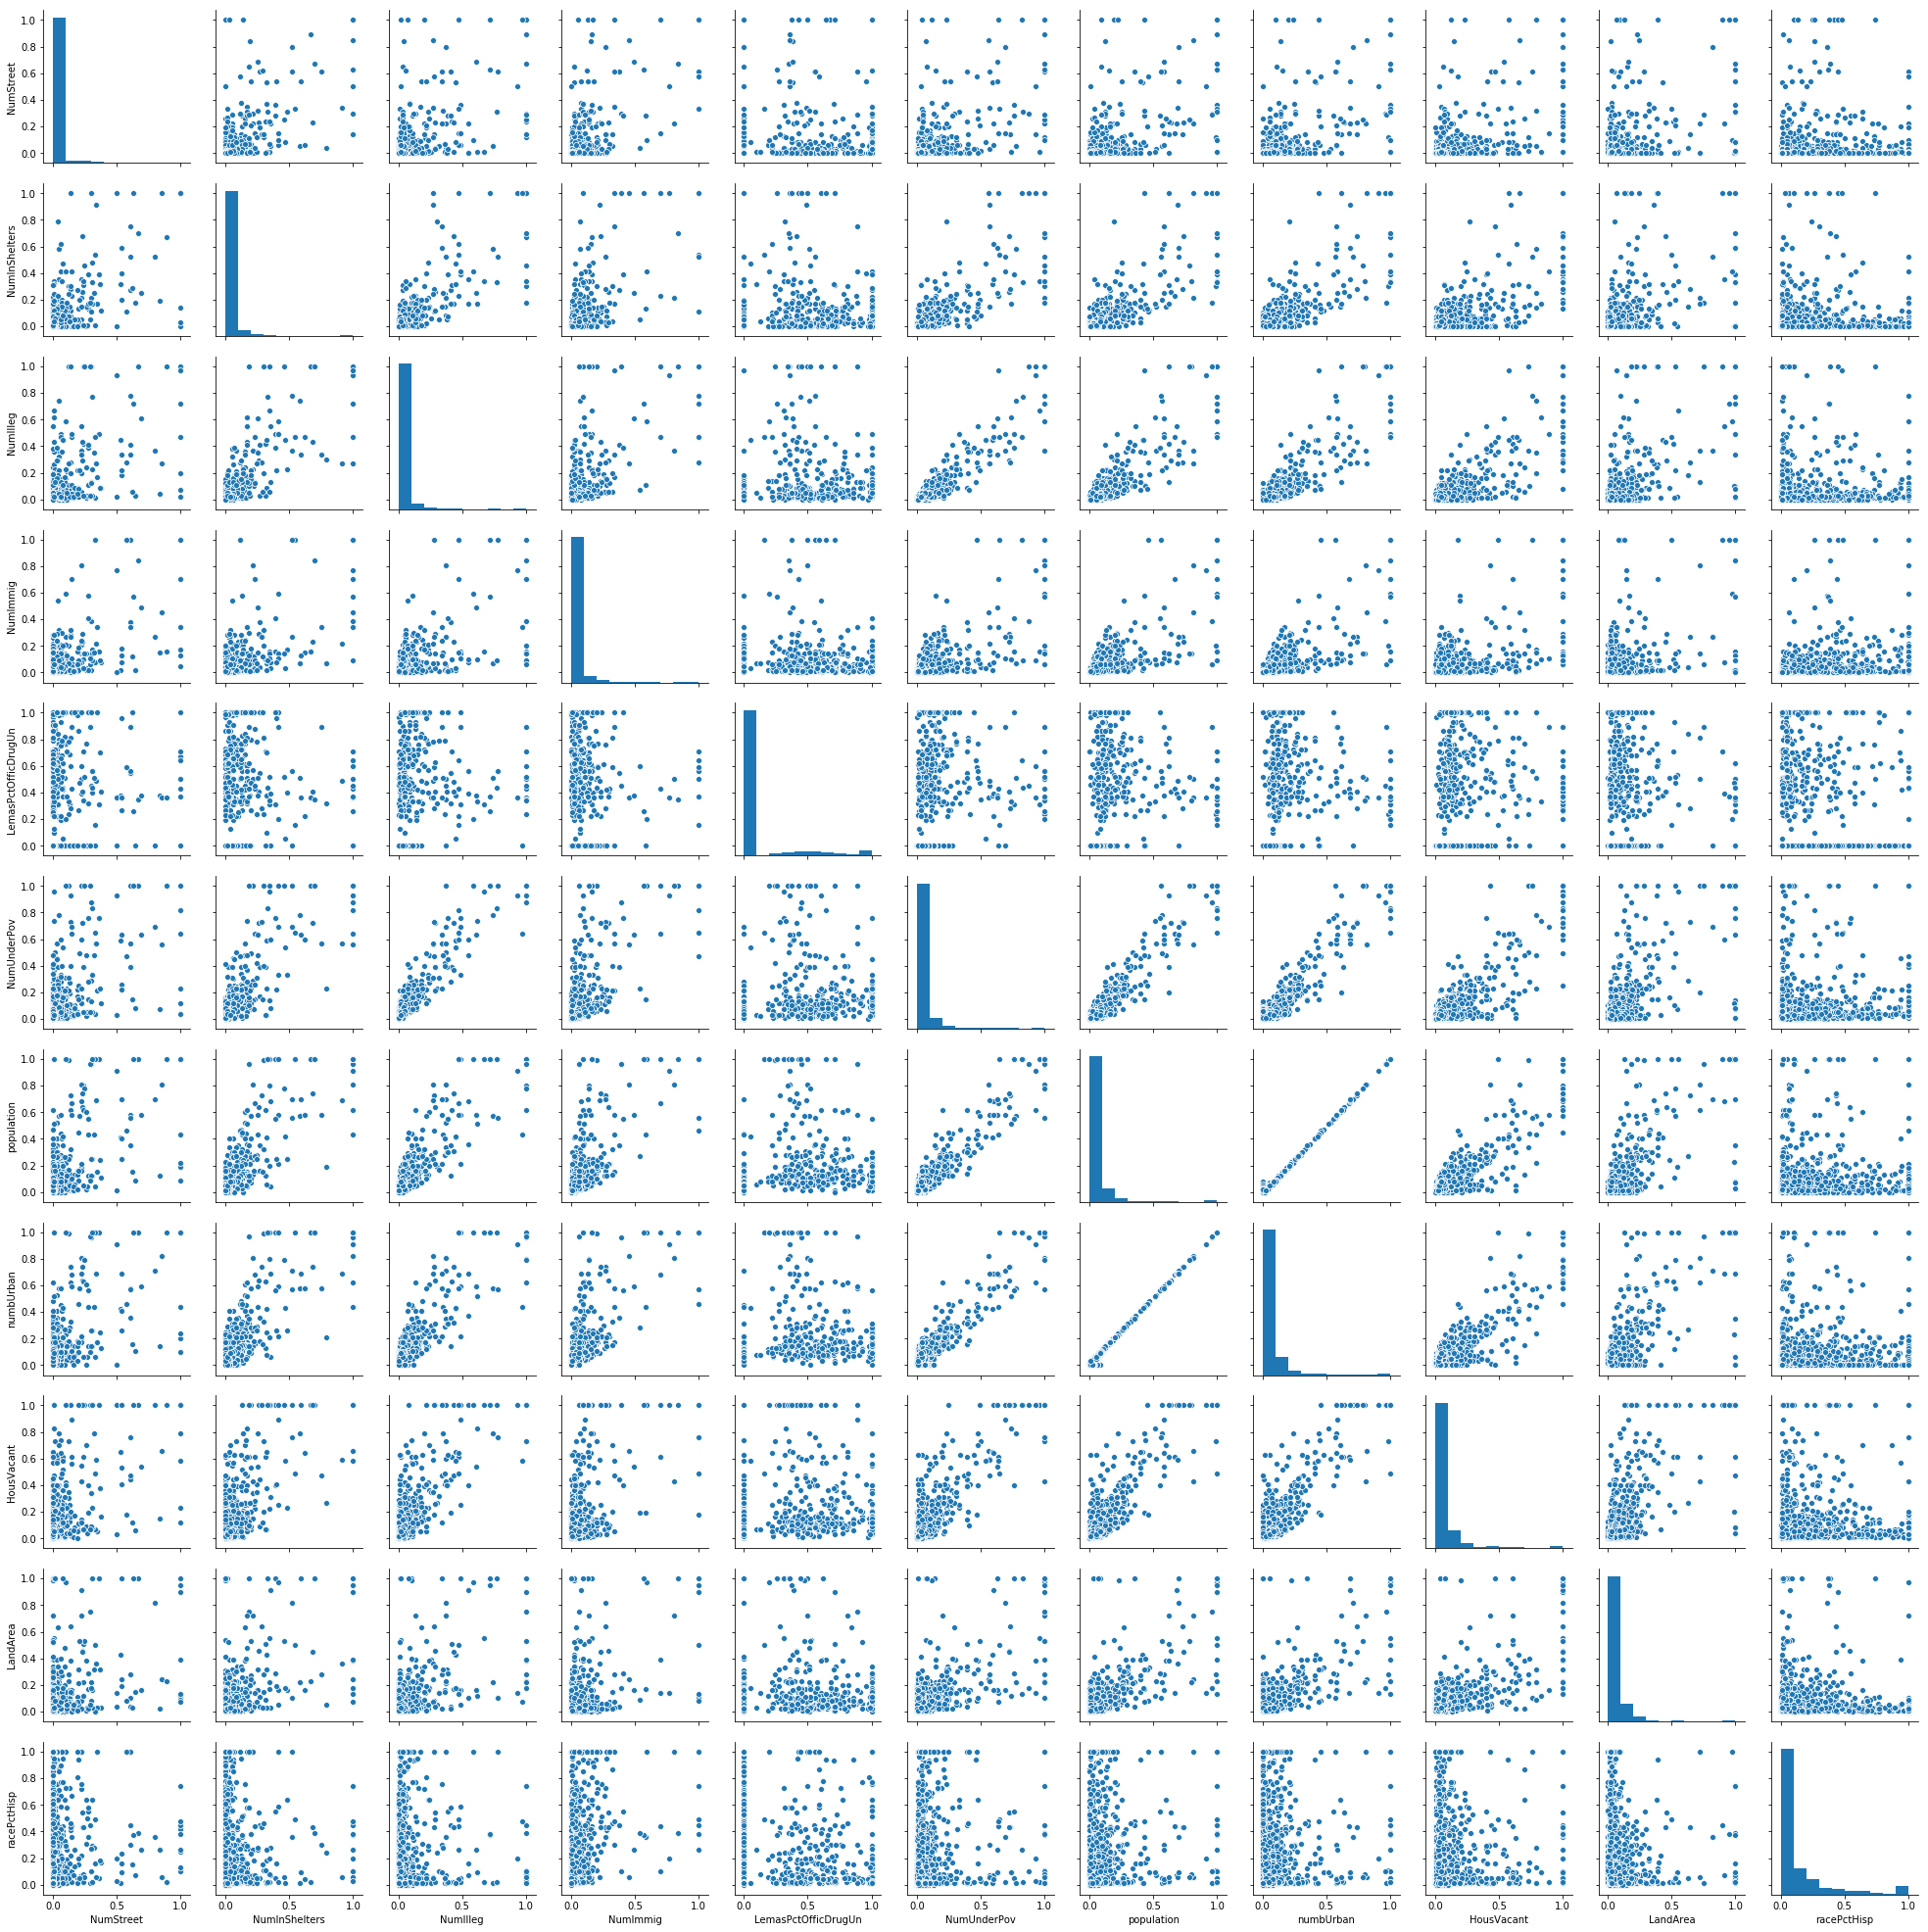

In [152]:
#sns.pairplot(req_df,hue='ViolentCrimesPerPop')
sns.pairplot(req_df)

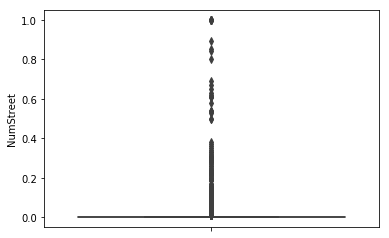

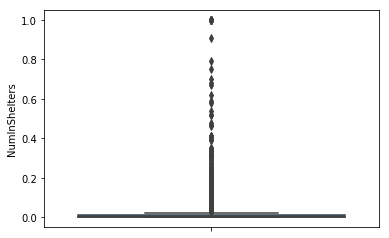

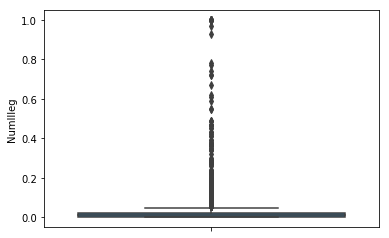

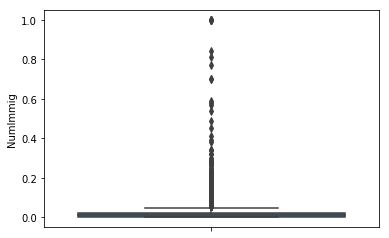

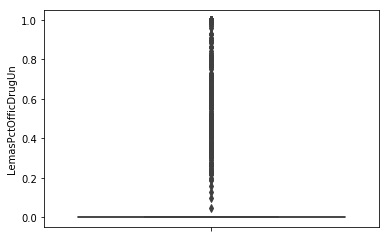

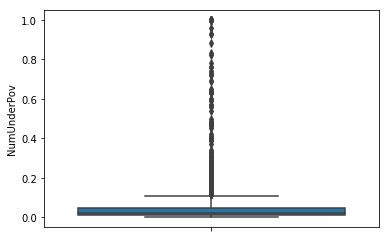

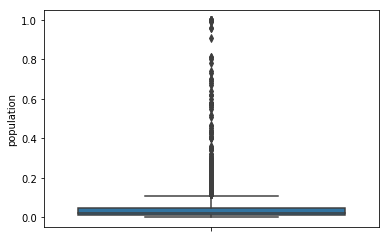

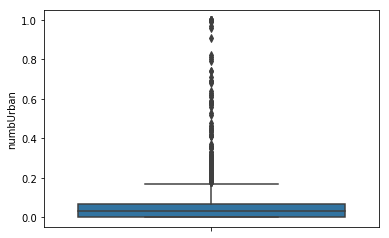

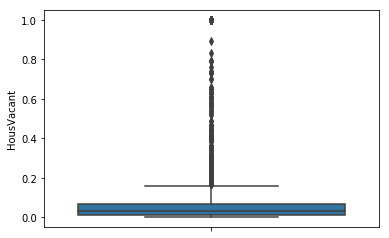

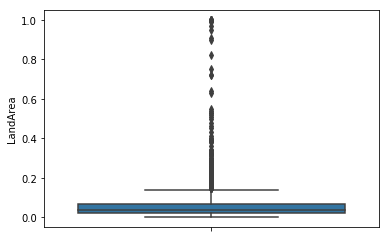

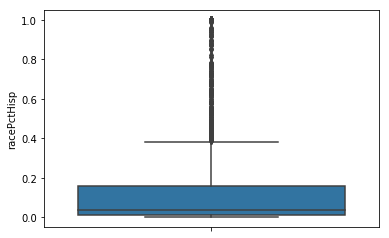

In [153]:
bp1=sns.boxplot(y=req_df["NumStreet"])
plt.show()
bp2=sns.boxplot(y=req_df["NumInShelters"])
plt.show()
bp3=sns.boxplot(y=req_df["NumIlleg"])
plt.show()
bp4=sns.boxplot(y=req_df["NumImmig"])
plt.show()
bp5=sns.boxplot(y=req_df["LemasPctOfficDrugUn"])
plt.show()
bp6=sns.boxplot(y=req_df["NumUnderPov"])
plt.show()
bp7=sns.boxplot(y=req_df["population"])
plt.show()
bp8=sns.boxplot(y=req_df["numbUrban"])
plt.show()
bp9=sns.boxplot(y=req_df["HousVacant"])
plt.show()
bp10=sns.boxplot(y=req_df["LandArea"])
plt.show()
bp11=sns.boxplot(y=req_df["racePctHisp"])
plt.show()

### Solution to 1(f) as below:

We're going to use multiple linear regression for this part.

We'll again split the dataset into train and test, since we've now removed our non-predictive features and imputed the missing values.

In [154]:
train_comm= comm.iloc[:1495,:]
test_comm=comm.iloc[1495:,:]
Y_train_comm=train_comm.iloc[:,-1]
Y_test_comm=test_comm.iloc[:,-1]
X_train_comm=train_comm.iloc[:,:-1]
X_test_comm=test_comm.iloc[:,:-1]

In [155]:
multi_reg=LinearRegression()
multi_reg.fit(X_train_comm, Y_train_comm)
multi_reg_pred = multi_reg.predict(X_test_comm)

In [156]:
#print('Mean Squared Error for Multiple Regression:', metrics.mean_squared_error(Y_test_comm, multi_reg_pred))
print('Test error for Multiple Regression:', np.sqrt(metrics.mean_squared_error(Y_test_comm, multi_reg_pred)))

Test error for Multiple Regression: 0.8886650254350752


### Solution to 1(g) as below:

We want log(alpha) to belong to {-3,-2,-1,0,1,2,3}. Hence, we'll choose the below values of alpha.

In [157]:
ridge= RidgeCV(alphas=(0.001,0.01,0.1,1,10,100,1000),cv=5).fit(X_train_comm, Y_train_comm)
ridge_pred=ridge.predict(X_test_comm)
print('the Value of alpha chosen is:',ridge.alpha_)
print('Test error for Ridge Regression after choosing alpha by cross validation:', np.sqrt(metrics.mean_squared_error(Y_test_comm, ridge_pred)))


the Value of alpha chosen is: 1.0
Test error for Ridge Regression after choosing alpha by cross validation: 0.13318063336800767


### Solution to 1(h) as below:

We'll first perform Lasso without the standardised features.

In [158]:
lasso= LassoCV(alphas=(0.001,0.01,0.1,1,10,100,1000),cv=5).fit(X_train_comm, Y_train_comm)
lasso_pred=lasso.predict(X_test_comm)
print('the Value of alpha chosen is:',lasso.alpha_)
print('Test error for Lasso after choosing alpha by cross validation:', np.sqrt(metrics.mean_squared_error(Y_test_comm, lasso_pred)))

the Value of alpha chosen is: 0.001
Test error for Lasso after choosing alpha by cross validation: 0.13245862679179723


In [159]:
k=lasso.coef_.tolist()
coeff_index=[]
for x in range(0,len(k)):
    if k[x] != 0 or k[x] != -0:
        coeff_index.append(x)
        
features_chosen=X_train_comm.iloc[:,coeff_index]
print("The features chosen by Lasso are:   ",features_chosen.columns)

The features chosen by Lasso are:    Index(['racepctblack', 'racePctWhite', 'agePct12t29', 'pctUrban',
       'pctWPubAsst', 'AsianPerCap', 'MalePctDivorce', 'PctKids2Par',
       'PctYoungKids2Par', 'PctWorkMom', 'PctIlleg', 'PctRecImmig10',
       'PctPersDenseHous', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded',
       'MedRentPctHousInc', 'MedOwnCostPctIncNoMtg', 'NumStreet',
       'PctForeignBorn', 'PctSameCity85', 'LemasGangUnitDeploy',
       'LemasPctOfficDrugUn'],
      dtype='object')


We'll now perform Lasso with the standardised features.

In [160]:
stdz = preprocessing.StandardScaler()
X_train_comm_stdz = stdz.fit_transform(X_train_comm)
X_train_comm_stdz = pd.DataFrame(X_train_comm_stdz,columns=features)

X_test_comm_stdz = stdz.fit_transform(X_test_comm)
X_test_comm_stdz = pd.DataFrame(X_test_comm_stdz,columns=features)

lasso_stdz= LassoCV(alphas=(0.001,0.01,0.1,1,10,100,1000),cv=5).fit(X_train_comm_stdz, Y_train_comm)
lasso_pred_stdz=lasso_stdz.predict(X_test_comm_stdz)
print('the Value of alpha chosen is:',lasso.alpha_)
print('Test error for Lasso after choosing alpha by cross validation:', np.sqrt(metrics.mean_squared_error(Y_test_comm, lasso_pred_stdz)))


the Value of alpha chosen is: 0.001
Test error for Lasso after choosing alpha by cross validation: 0.13399646177086194


In [161]:
k=lasso_stdz.coef_.tolist()
coeff_index=[]
for x in range(0,len(k)):
    if k[x] != 0 or k[x] != -0:
        coeff_index.append(x)
        
features_chosen=X_train_comm_stdz.iloc[:,coeff_index]
print("The features chosen by Lasso are:   ",features_chosen.columns)

The features chosen by Lasso are:    Index(['racepctblack', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage',
       'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire',
       'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap',
       'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade',
       'PctEmploy', 'PctEmplManu', 'MalePctDivorce', 'MalePctNevMarr',
       'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
       'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec5',
       'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant',
       'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
       'PctWOFullPlumb', 'RentLowQ', 'MedRent', 'MedRentPctHousInc',
       'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters',
       'NumStreet', 'PctForeignBorn', 'PctSameCity85', 'LemasSwFTFieldPerPop',
      

We see that the test error goes up with standardization of features. We also see that with Standarization, the coefficients of lesser number of features is reduced to 0. In other words, Standardization model with Lasso chooses more features than the normalized one with Lasso.

### Solution to 1(i) as below:

In [162]:
#http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html
pca = PCA()
X_train_comm_red = pca.fit_transform(preprocessing.scale(X_train_comm))
n = len(X_train_comm_red)
tenfcv = model_selection.KFold(n_splits=10)
mse = []
linreg = LinearRegression()
M=[]
for i in range(1, 21):
    M.append(i)
    score = -1*model_selection.cross_val_score(linreg, X_train_comm_red[:,:i], Y_train_comm.ravel(), cv=tenfcv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

In [163]:
component_ana=pd.DataFrame({'No of components(M)':M, 'MSE':mse})
component_ana.sort_values(by='MSE')

No of components(M)       MSE
17                   18  0.020363
18                   19  0.020365
19                   20  0.020400
16                   17  0.020603
15                   16  0.020733
14                   15  0.020773
12                   13  0.020797
13                   14  0.020821
10                   11  0.021047
9                    10  0.021054
11                   12  0.021081
8                     9  0.021153
7                     8  0.021981
6                     7  0.025918
4                     5  0.026273
5                     6  0.026331
2                     3  0.028457
3                     4  0.028535
1                     2  0.029367
0                     1  0.033087

We see that when M=18 components are used , we get the lowest MSE. 

In [164]:
X_test_comm_red = pca.transform(preprocessing.scale(X_test_comm))[:,:19]
linreg = LinearRegression()
linreg.fit(X_train_comm_red[:,:19], Y_train_comm)
linreg_pred = linreg.predict(X_test_comm_red)
print('Test error for PCR:  ', np.sqrt(metrics.mean_squared_error(Y_test_comm, linreg_pred)))

Test error for PCR:   0.13378804037171377


### Solution to 1(j) as below:

We'll pass different parameter lists to the xgb.XGBRegressor funntion with all same except different values of alpha.
We'll then choose the best value of alpha from among these and proceed with it to train the model and then test it.

In [372]:
dmatrix = xgb.DMatrix(data=X_train_comm,label=Y_train_comm)


params = {"objective":"reg:linear","alpha": 0.001,"booster":"gbtree"}
cv_alp1 = xgb.cv(dtrain=dmatrix, params=params, nfold=5,num_boost_round=50,metrics="rmse")


params = {"objective":"reg:linear","alpha": 0.01,"booster":"gbtree"}
cv_alp2 = xgb.cv(dtrain=dmatrix, params=params, nfold=5,num_boost_round=50,metrics="rmse")

params = {"objective":"reg:linear","alpha": 0.1,"booster":"gbtree"}
cv_alp3 = xgb.cv(dtrain=dmatrix, params=params, nfold=5,num_boost_round=50,metrics="rmse")

params = {"objective":"reg:linear","alpha": 1,"booster":"gbtree"}
cv_alp4 = xgb.cv(dtrain=dmatrix, params=params, nfold=5,num_boost_round=50,metrics="rmse")

params = {"objective":"reg:linear","alpha": 10,"booster":"gbtree"}
cv_alp5 = xgb.cv(dtrain=dmatrix, params=params, nfold=5,num_boost_round=50,metrics="rmse")

params = {"objective":"reg:linear","alpha": 100,"booster":"gbtree"}
cv_alp6 = xgb.cv(dtrain=dmatrix, params=params, nfold=5,num_boost_round=50,metrics="rmse")

params = {"objective":"reg:linear","alpha": 1000,"booster":"gbtree"}
cv_alp7 = xgb.cv(dtrain=dmatrix, params=params, nfold=5,num_boost_round=50,metrics="rmse")





[14:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[14:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 102 extra nodes, 0 pruned nodes, max_depth=6
[14:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[14:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[14:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[14:20:30] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, m

[14:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[14:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 78 extra nodes, 0 pruned nodes, max_depth=6
[14:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=6
[14:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[14:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[14:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:20:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max

[14:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[14:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=6
[14:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[14:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[14:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[14:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[14:20:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max

[14:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[14:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[14:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 96 extra nodes, 0 pruned nodes, max_depth=6
[14:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[14:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[14:20:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, ma

[14:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[14:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[14:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[14:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[14:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 82 extra nodes, 0 pruned nodes, max_depth=6
[14:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[14:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[14:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_

[14:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[14:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[14:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=6
[14:20:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[14:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[14:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[14:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=6
[14:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 86 extra nodes, 0 pruned nodes, max_depth=6
[14:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, m

[14:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[14:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 92 extra nodes, 0 pruned nodes, max_depth=6
[14:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[14:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 0 pruned nodes, max_depth=6
[14:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 84 extra nodes, 0 pruned nodes, max_depth=6
[14:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 90 extra nodes, 0 pruned nodes, max_depth=6
[14:20:35] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max

[14:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=6
[14:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[14:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[14:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[14:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[14:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[14:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[14:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=6
[14:20:36] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_

[14:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[14:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[14:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[14:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=6
[14:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 100 extra nodes, 0 pruned nodes, max_depth=6
[14:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=6
[14:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 64 extra nodes, 0 pruned nodes, max_depth=6
[14:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[14:20:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max

[14:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[14:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[14:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[14:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[14:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=6
[14:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[14:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=6
[14:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[14:20:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_

[14:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[14:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=6
[14:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=6
[14:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[14:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[14:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=6
[14:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[14:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[14:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_

[14:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[14:20:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=6
[14:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[14:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=6
[14:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[14:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[14:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[14:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=6
[14:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_

[14:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[14:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[14:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[14:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=6
[14:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[14:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=6
[14:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[14:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=6
[14:20:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_

[14:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[14:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[14:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[14:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[14:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[14:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[14:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[14:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[14:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[

[14:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[

[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[

[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[

[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[

[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[14:20:42] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[

In [373]:
#contains results for each boosting round, we choose the last or the final round's results , since the final model comes at the last step.
cv_alp1

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0          0.259957        0.001642        0.269557       0.006117
1          0.196061        0.001640        0.217750       0.005060
2          0.151693        0.001081        0.186879       0.006398
3          0.121188        0.001386        0.168071       0.005033
4          0.099802        0.001478        0.158997       0.005268
5          0.084668        0.001525        0.154410       0.005049
6          0.074439        0.001218        0.151933       0.005029
7          0.066963        0.000760        0.151025       0.005197
8          0.061499        0.000423        0.150800       0.005357
9          0.056798        0.000605        0.150319       0.005236
10         0.053581        0.000515        0.150162       0.005596
11         0.050193        0.000750        0.150785       0.005377
12         0.047633        0.001031        0.151062       0.005438
13         0.045404        0.001325        0.151121       0.005519
14         0.043230        0.000995        0.151138       0.005578
15         0.040846        0.001077        0.151003       0.005328
16         0.039078        0.000989        0.151174       0.005318
17         0.037413        0.000661        0.151326       0.005264
18         0.035992        0.000767        0.151119       0.005112
19         0.034591        0.000931        0.151325       0.004983
20         0.033243        0.001199        0.151377       0.005164
21         0.031420        0.000966        0.151372       0.005165
22         0.030023        0.001295        0.151300       0.005346
23         0.028851        0.001482        0.151147       0.005290
24         0.027720        0.001643        0.151213       0.005307
25         0.026306        0.001283        0.151290       0.005198
26         0.025151        0.001384        0.151225       0.005107
27         0.024417        0.001445        0.151194       0.005109
28         0.023580        0.001109        0.151161       0.005104
29         0.022621        0.001041        0.151156       0.005118
30         0.021666        0.001054        0.151208       0.005026
31         0.020646        0.001099        0.151043       0.004901
32         0.019844        0.001193        0.151025       0.004841
33         0.019017        0.001111        0.150987       0.004834
34         0.018317        0.000940        0.151023       0.004838
35         0.017445        0.000779        0.151167       0.004891
36         0.016647        0.000524        0.151107       0.004833
37         0.015714        0.000721        0.151170       0.004969
38         0.015101        0.000778        0.151180       0.004994
39         0.014480        0.000907        0.151123       0.004992
40         0.013888        0.001048        0.151175       0.004990
41         0.013332        0.000979        0.151167       0.004956
42         0.012716        0.000817        0.151182       0.004952
43         0.012297        0.000982        0.151205       0.004967
44         0.011784        0.000857        0.151205       0.004997
45         0.011246        0.000862        0.151237       0.005007
46         0.010802        0.000952        0.151238       0.005007
47         0.010404        0.001008        0.151188       0.004995
48         0.010023        0.001033        0.151185       0.004918
49         0.009620        0.000953        0.151197       0.004940

In [375]:
print(' the final boosting round RMSE for alpha = 0.001 is')
print(cv_alp1['test-rmse-mean'].tail(1))
print(' the final boosting round RMSE for alpha = 0.01 is')
print(cv_alp2['test-rmse-mean'].tail(1))
print(' the final boosting round RMSE for alpha = 0.1 is')
print(cv_alp3['test-rmse-mean'].tail(1))
print(' the final boosting round RMSE for alpha = 1 is')
print(cv_alp4['test-rmse-mean'].tail(1))
print(' the final boosting round RMSE for alpha = 10 is')
print(cv_alp5['test-rmse-mean'].tail(1))
print(' the final boosting round RMSE for alpha = 100 is')
print(cv_alp6['test-rmse-mean'].tail(1))
print(' the final boosting round RMSE for alpha = 1000 is')
print(cv_alp7['test-rmse-mean'].tail(1))

 the final boosting round RMSE for alpha = 0.001 is
49    0.151197
Name: test-rmse-mean, dtype: float64
 the final boosting round RMSE for alpha = 0.01 is
49    0.148104
Name: test-rmse-mean, dtype: float64
 the final boosting round RMSE for alpha = 0.1 is
49    0.150819
Name: test-rmse-mean, dtype: float64
 the final boosting round RMSE for alpha = 1 is
49    0.147111
Name: test-rmse-mean, dtype: float64
 the final boosting round RMSE for alpha = 10 is
49    0.148713
Name: test-rmse-mean, dtype: float64
 the final boosting round RMSE for alpha = 100 is
49    0.206698
Name: test-rmse-mean, dtype: float64
 the final boosting round RMSE for alpha = 1000 is
49    0.351665
Name: test-rmse-mean, dtype: float64


We'll choose the alpha with the lowest RMSE which is alpha = 1. Now, we 'll train using this value of alpha and find the test error.

In [365]:
xgbst = xgb.XGBRegressor(objective ='reg:linear', booster='gbtree', alpha = 1, n_estimators = 100)
xgbst.fit(X_train_comm,Y_train_comm)
xgbst_pred = xgbst.predict(X_test_comm)
print('Test error for XGBoost:  ', np.sqrt(metrics.mean_squared_error(Y_test_comm, xgbst_pred)))

Test error for XGBoost:   0.1275706822071068


### Solution for 2(a) as below:

We've downloaded the train and test csv's for the question 2.

In [168]:
for x in glob.glob('/Users/sharadsharma/Downloads/Homework4Data/aps*.csv'):
    print(x)

/Users/sharadsharma/Downloads/Homework4Data/aps_failure_test_set.csv
/Users/sharadsharma/Downloads/Homework4Data/aps_failure_training_set.csv


### Solution for 2(b)(i) as below:

In [249]:
aps_train=pd.read_csv('/Users/sharadsharma/Downloads/Homework4Data/aps_failure_training_set.csv')
aps_test=pd.read_csv('/Users/sharadsharma/Downloads/Homework4Data/aps_failure_test_set.csv')

In [247]:
full_df=pd.concat([aps_train, aps_test],ignore_index=True)

In [253]:
full_df.head(5)

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698     na  2130706438    280      0      0      0      0      0   
1   neg   33058     na           0     na      0      0      0      0      0   
2   neg   41040     na         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874     na        1368    458      0      0      0      0      0   

   ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008 ee_009 ef_000  \
0  ...  1240520  493384  721044  469792  339156  157956   73224      0      0   
1  ...   421400  178064  293306  245416  133654   81140   97576   1500      0   
2  ...   277378  159812  423992  409564  320746  158022   95128    514      0   
3  ...      240      46      58      44      10       0       0      0      4   
4  ...   622012  229790  405298  347188  286954  311560  433954   1218      0   

  eg_000  
0      0  
1      0  
2      0  
3     32  
4      0  

[5 rows x 171 columns]

In [259]:
full_df.shape

(76000, 171)

In [263]:
full_df_features=full_df.iloc[:,1:]
full_df_features=full_df_features.replace('na','NaN')
imputer_ = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_=imputer_.fit(full_df_features)
full_df_features=imputer_.transform(full_df_features)
cols1=full_df.iloc[:,1:].columns
full_df_features_imp=pd.DataFrame(data=full_df_features, columns=cols1)

In [281]:
full_df_features_imp.head(5)

aa_000   ab_000        ac_000         ad_000  ae_000  af_000  ag_000  \
0  76698.0  0.72556  2.130706e+09     280.000000     0.0     0.0     0.0   
1  33058.0  0.72556  0.000000e+00  150629.962105     0.0     0.0     0.0   
2  41040.0  0.72556  2.280000e+02     100.000000     0.0     0.0     0.0   
3     12.0  0.00000  7.000000e+01      66.000000     0.0    10.0     0.0   
4  60874.0  0.72556  1.368000e+03     458.000000     0.0     0.0     0.0   

   ag_001  ag_002  ag_003  ...     ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3     0.0     0.0   318.0  ...      240.0      46.0      58.0      44.0   
4     0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  339156.0  157956.0   73224.0     0.0     0.0     0.0  
1  133654.0   81140.0   97576.0  1500.0     0.0     0.0  
2  320746.0  158022.0   95128.0   514.0     0.0     0.0  
3      10.0       0.0       0.0     0.0     4.0    32.0  
4  286954.0  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 170 columns]

In [272]:
t=full_df['class']
class_df=pd.DataFrame({'class':t.values})
full_df2=pd.concat([class_df,full_df_features_imp],axis=1)

In [275]:
full_df2.shape

(76000, 171)

In [278]:
full_df2.head(5)

class   aa_000   ab_000        ac_000         ad_000  ae_000  af_000  \
0   neg  76698.0  0.72556  2.130706e+09     280.000000     0.0     0.0   
1   neg  33058.0  0.72556  0.000000e+00  150629.962105     0.0     0.0   
2   neg  41040.0  0.72556  2.280000e+02     100.000000     0.0     0.0   
3   neg     12.0  0.00000  7.000000e+01      66.000000     0.0    10.0   
4   neg  60874.0  0.72556  1.368000e+03     458.000000     0.0     0.0   

   ag_000  ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005  \
0     0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1     0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2     0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3     0.0     0.0     0.0  ...      240.0      46.0      58.0      44.0   
4     0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   

     ee_006    ee_007    ee_008  ee_009  ef_000  eg_000  
0  339156.0  157956.0   73224.0     0.0     0.0     0.0  
1  133654.0   81140.0   97576.0  1500.0     0.0     0.0  
2  320746.0  158022.0   95128.0   514.0     0.0     0.0  
3      10.0       0.0       0.0     0.0     4.0    32.0  
4  286954.0  311560.0  433954.0  1218.0     0.0     0.0  

[5 rows x 171 columns]

### Solution to 2(b)(ii) as below:

In [293]:
data_cv=[]
data_std=full_df_features_imp.std().tolist()
data_mean=full_df_features_imp.mean().tolist()
for i,j in zip(data_std,data_mean):
    data_cv.append(i/j)
data_cv_df=pd.DataFrame({'Features':full_df_features_imp.columns,'Sample Std':data_std,'Sample Mean':data_mean,'CV':data_cv})

In [295]:
data_cv_df

Features    Sample Std   Sample Mean          CV
0     aa_000  2.647366e+05  6.115976e+04    4.328608
1     ab_000  1.580468e+00  7.255604e-01    2.178273
2     ac_000  7.726379e+08  3.564398e+08    2.167653
3     ad_000  3.113845e+07  1.506300e+05  206.721500
4     ae_000  1.501915e+02  6.736959e+00   22.293670
5     af_000  1.973186e+02  1.083631e+01   18.209016
6     ag_000  1.833152e+04  2.004306e+02   91.460654
7     ag_001  5.070158e+04  1.204761e+03   42.084343
8     ag_002  1.709242e+05  9.697328e+03   17.625909
9     ag_003  8.197379e+05  9.364902e+04    8.753300
10    ag_004  2.454728e+06  4.483426e+05    5.475116
11    ag_005  3.327565e+06  1.122573e+06    2.964230
12    ag_006  3.920051e+06  1.666272e+06    2.352588
13    ag_007  1.408486e+06  5.007954e+05    2.812498
14    ag_008  2.236647e+05  3.564389e+04    6.274980
15    ag_009  1.690622e+05  5.255755e+03   32.167057
16    ah_000  4.243510e+06  1.832622e+06    2.315540
17    ai_000  1.776093e+05  9.597229e+03   18.506308
18    aj_000  5.035822e+04  1.167200e+03   43.144480
19    ak_000  7.618109e+04  9.689417e+02   78.622988
20    al_000  5.613523e+05  6.160588e+04    9.111991
21      am_0  8.817367e+05  9.724470e+04    9.067195
22    an_000  7.896729e+06  3.503077e+06    2.254227
23    ao_000  6.918463e+06  3.039594e+06    2.276114
24    ap_000  3.145632e+06  1.019361e+06    3.085885
25    aq_000  1.281762e+06  4.491939e+05    2.853471
26    ar_000  5.209318e+00  4.928771e-01   10.569202
27    as_000  2.816704e+04  2.473336e+02  113.882755
28    at_000  1.204967e+05  5.196723e+03   23.187060
29    au_000  2.582009e+04  2.999350e+02   86.085638
..       ...           ...           ...         ...
140   dl_000  1.081450e+06  2.887204e+04   37.456647
141   dm_000  2.709375e+05  7.841488e+03   34.551802
142   dn_000  9.846790e+04  3.424801e+04    2.875142
143   do_000  6.264461e+04  2.880935e+04    2.174454
144   dp_000  1.412504e+04  7.029668e+03    2.009346
145   dq_000  9.226554e+07  4.355312e+06   21.184599
146   dr_000  1.337730e+06  2.031181e+05    6.585971
147   ds_000  2.071216e+05  9.044653e+04    2.289989
148   dt_000  3.361921e+04  1.552771e+04    2.165110
149   du_000  1.152267e+07  4.120840e+06    2.796194
150   dv_000  2.086546e+06  6.044064e+05    3.452224
151   dx_000  4.030501e+06  7.894708e+05    5.105320
152   dy_000  5.893560e+04  7.840397e+03    7.516916
153   dz_000  1.016013e+01  2.063021e-01   49.248806
154   ea_000  5.032914e+01  1.535489e+00   32.777270
155   eb_000  4.507978e+07  9.924878e+06    4.542099
156    ec_00  3.230631e+03  1.358262e+03    2.378503
157   ed_000  3.296095e+03  1.464653e+03    2.250427
158   ee_000  2.508391e+06  7.445035e+05    3.369214
159   ee_001  2.550369e+06  7.883109e+05    3.235232
160   ee_002  1.170523e+06  4.495763e+05    2.603613
161   ee_003  5.487441e+05  2.132460e+05    2.573291
162   ee_004  1.183134e+06  4.506478e+05    2.625407
163   ee_005  1.145078e+06  4.006204e+05    2.858261
164   ee_006  1.091658e+06  3.378689e+05    3.231010
165   ee_007  1.697870e+06  3.475611e+05    4.885098
166   ee_008  4.665609e+05  1.398968e+05    3.335037
167   ee_009  4.847679e+04  8.424984e+03    5.753933
168   ef_000  4.082618e+00  8.519734e-02   47.919544
169   eg_000  9.999582e+00  2.190443e-01   45.650950

[170 rows x 4 columns]

### Solution to 2(b)(iii) as below:

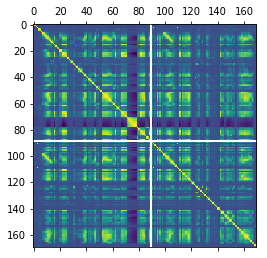

In [298]:
import matplotlib.pyplot as plt
plt.matshow(full_df_features_imp.corr())
plt.show()

### Solution to 2(b)(iv) as below:

In [299]:
data_cv_df.sort_values(by='CV',ascending=False).head(13)

Features    Sample Std    Sample Mean          CV
91    cf_000  3.113845e+07  150231.156793  207.270274
109   co_000  3.113845e+07  150517.375486  206.876129
3     ad_000  3.113845e+07  150629.962105  206.721500
122   cs_009  1.973109e+05    1024.871550  192.522611
138   dj_000  3.891172e+03      31.861380  122.128153
27    as_000  2.816704e+04     247.333635  113.882755
136   dh_000  4.847230e+05    4302.818274  112.652450
134   df_000  7.795510e+05    6999.670936  111.369666
6     ag_000  1.833152e+04     200.430636   91.460654
29    au_000  2.582009e+04     299.934980   86.085638
19    ak_000  7.618109e+04     968.941678   78.622988
51    az_009  2.933382e+03      37.607677   77.999556
41    ay_009  8.971722e+04    1158.222873   77.461101

The 13 features with the highest CV are 'cf_000','co_000','ad_000','cs_009','dj_000','as_000','dh_000','df_000','ag_000','au_000','ak_000','az_009','ay_009'

In [302]:
req_feat=full_df2[['class','cf_000','co_000','ad_000','cs_009','dj_000','as_000','dh_000','df_000','ag_000','au_000','ak_000','az_009','ay_009']]


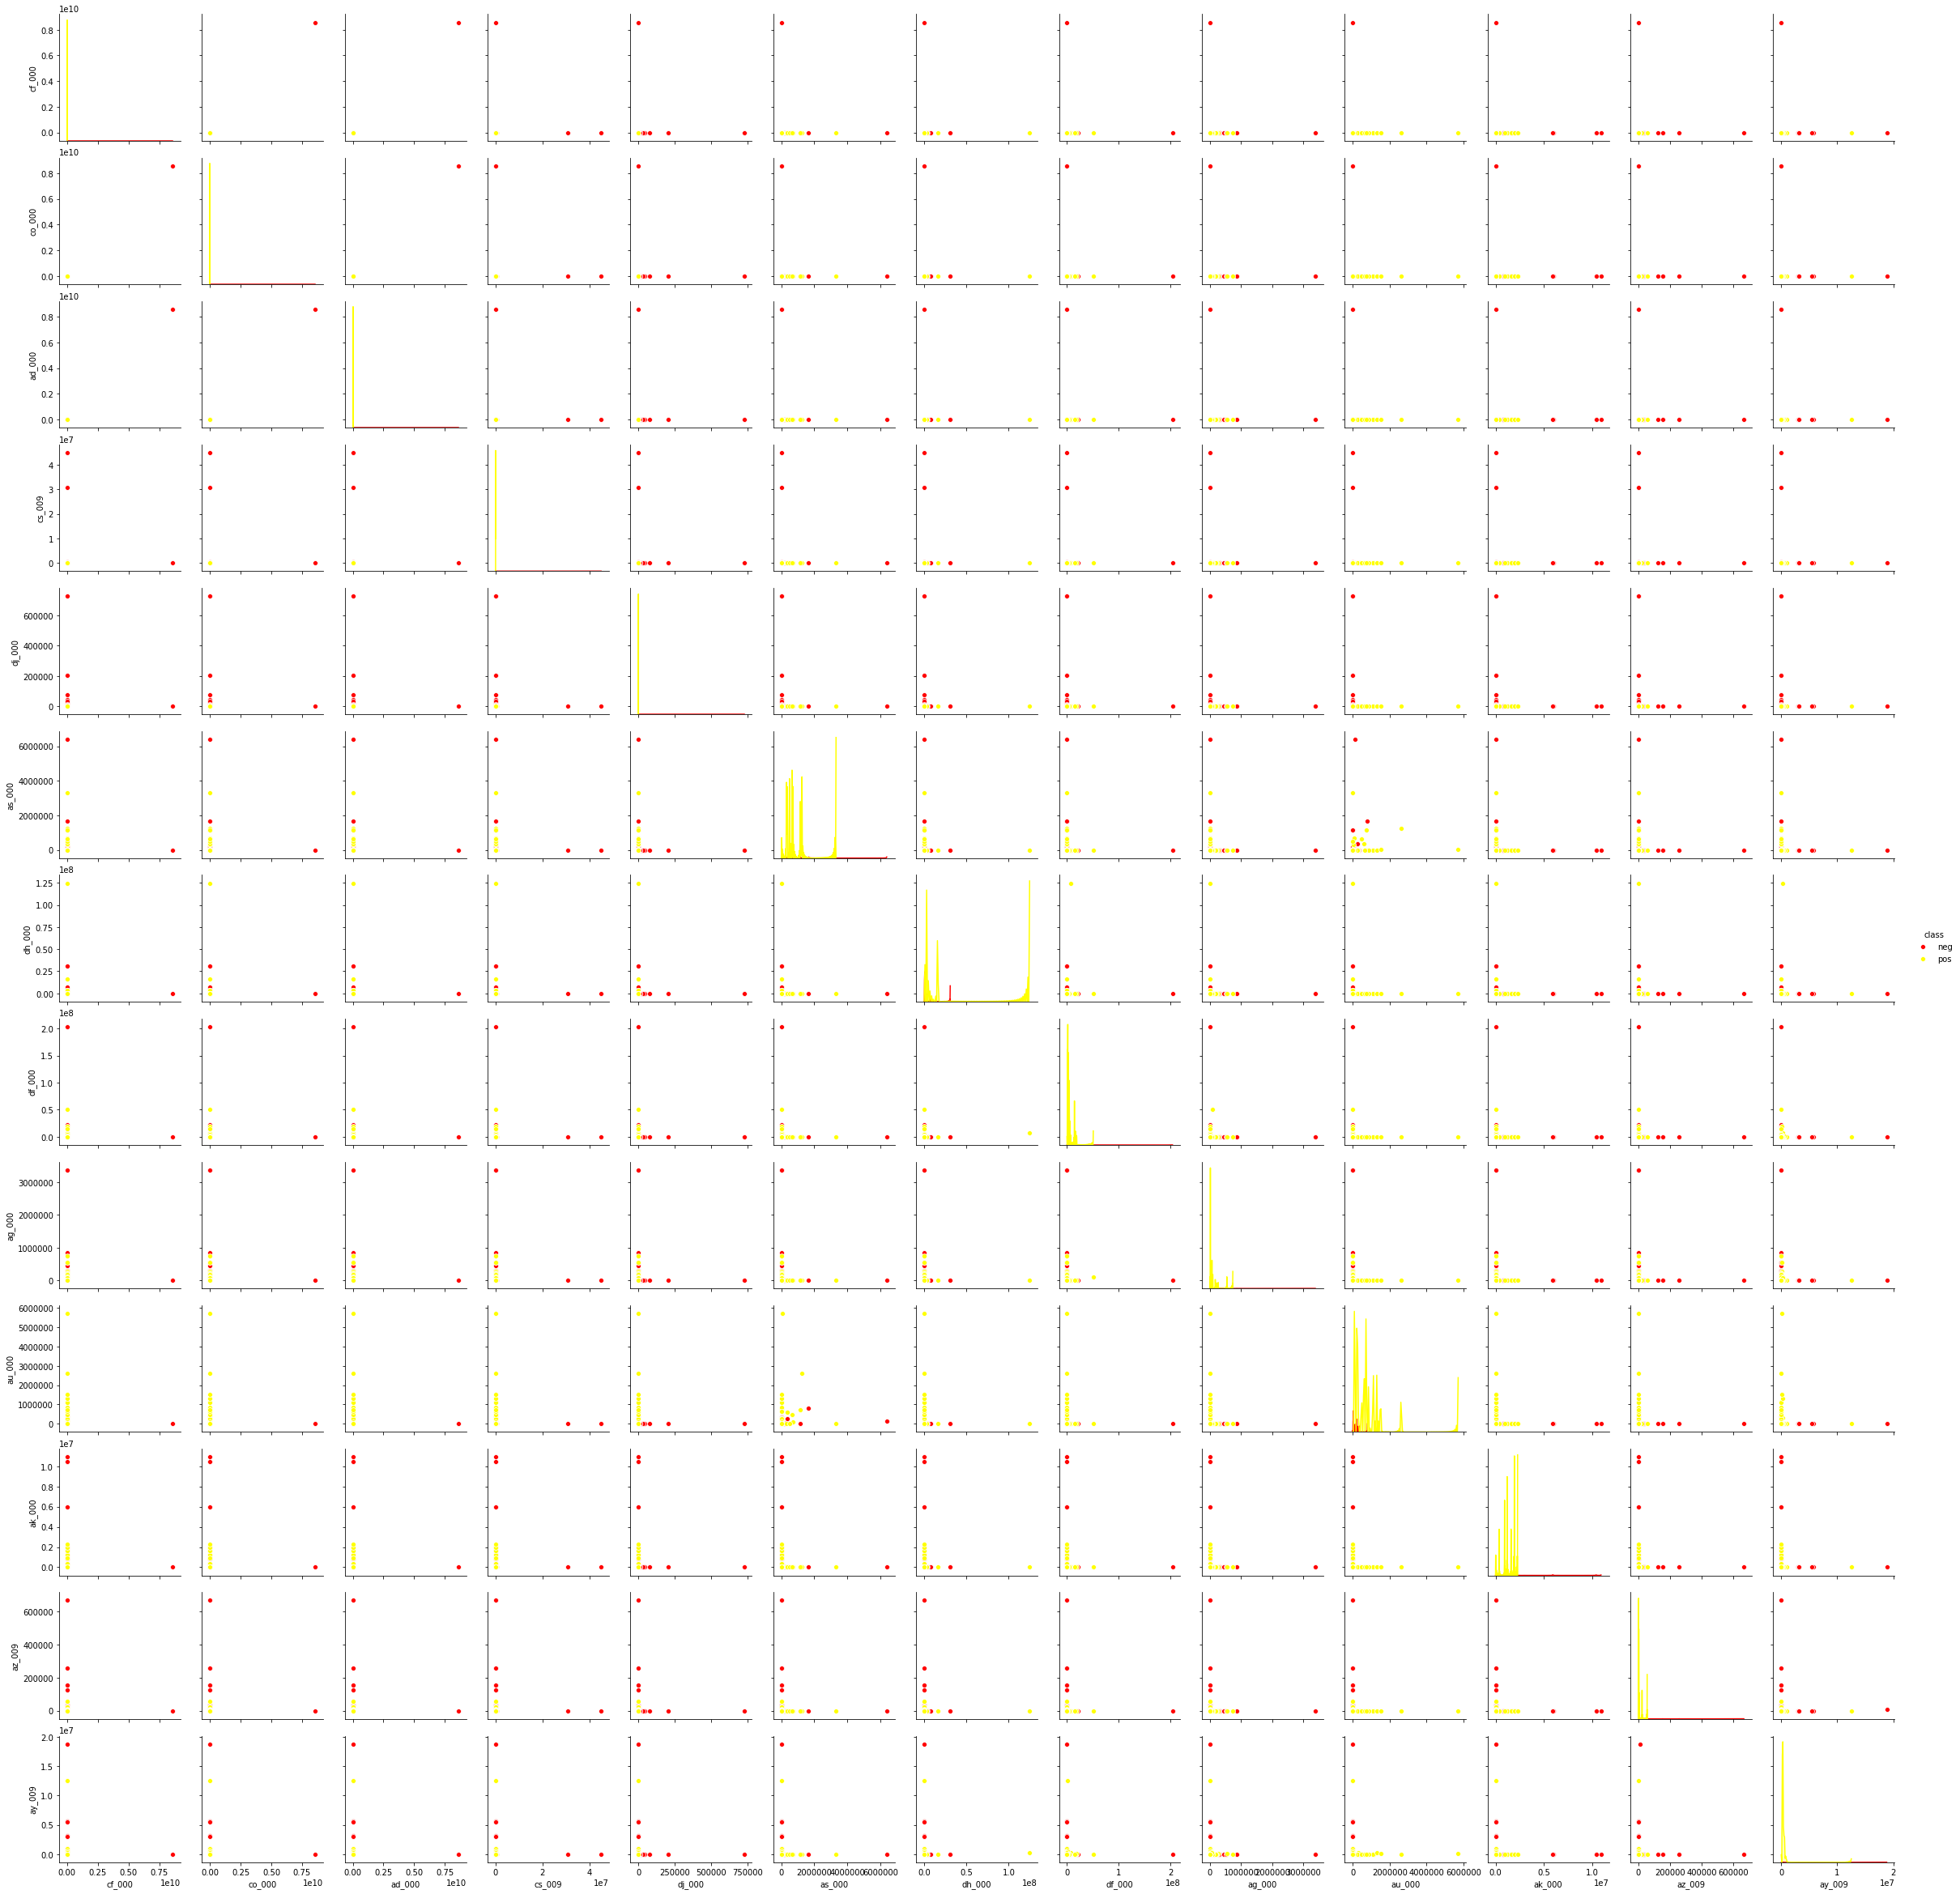

In [305]:
sns.pairplot(req_feat,hue='class',palette=['red','yellow'])

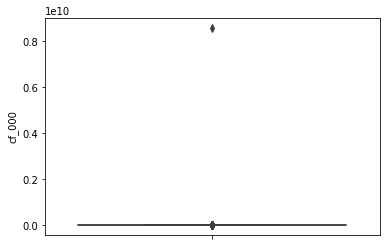

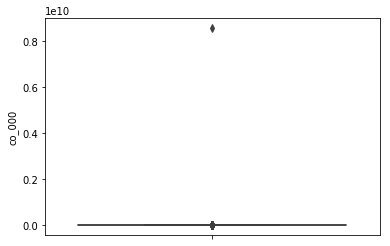

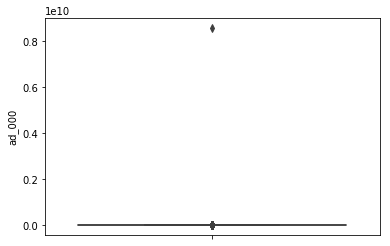

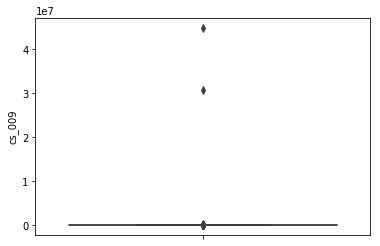

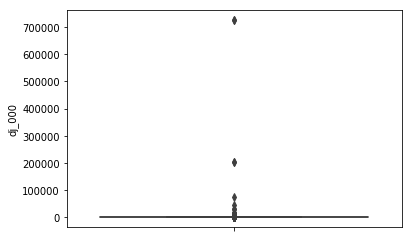

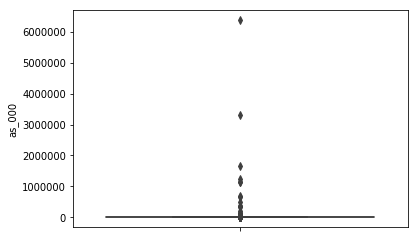

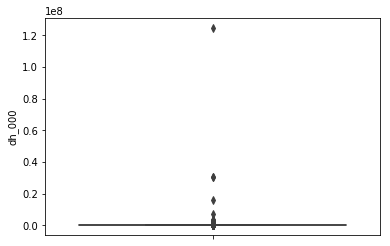

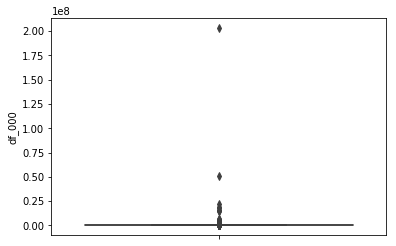

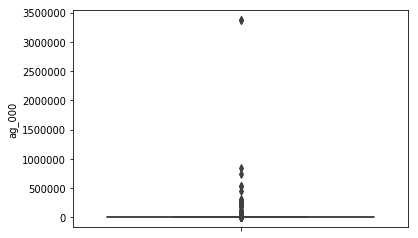

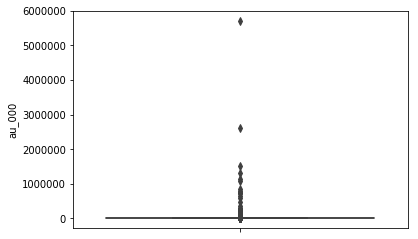

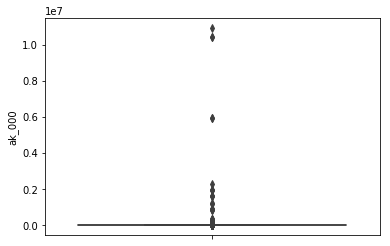

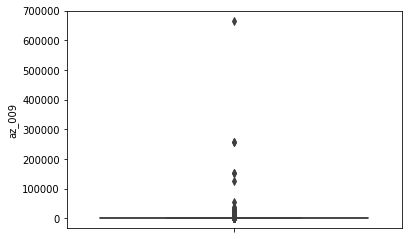

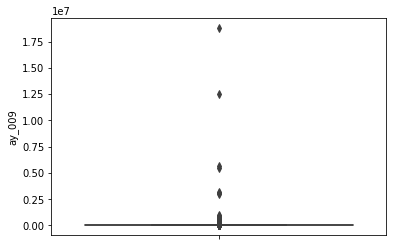

In [306]:
bp1=sns.boxplot(y='cf_000',hue='class',data=req_feat)
plt.show()
bp2=sns.boxplot(y='co_000',hue='class',data=req_feat)
plt.show()
bp3=sns.boxplot(y='ad_000',hue='class',data=req_feat)
plt.show()
bp4=sns.boxplot(y='cs_009',hue='class',data=req_feat)
plt.show()
bp5=sns.boxplot(y='dj_000',hue='class',data=req_feat)
plt.show()
bp6=sns.boxplot(y='as_000',hue='class',data=req_feat)
plt.show()
bp7=sns.boxplot(y='dh_000',hue='class',data=req_feat)
plt.show()
bp8=sns.boxplot(y='df_000',hue='class',data=req_feat)
plt.show()
bp9=sns.boxplot(y='ag_000',hue='class',data=req_feat)
plt.show()
bp10=sns.boxplot(y='au_000',hue='class',data=req_feat)
plt.show()
bp11=sns.boxplot(y='ak_000',hue='class',data=req_feat)
plt.show()
bp12=sns.boxplot(y='az_009',hue='class',data=req_feat)
plt.show()
bp13=sns.boxplot(y='ay_009',hue='class',data=req_feat)
plt.show()

### Solution to 2(b)(v) as below:

In [308]:
full_df2['class'].value_counts()

neg    74625
pos     1375
Name: class, dtype: int64

We see that the number of negative data is way more ( almost 54 times) than the positive data. Hence, we can say that the dataset is imbalanced.

### Solution to 2(c) as below:

We'll split the dataset back into the training and test sets for the purpose of this and following questions.

In [507]:
aps_train=full_df2.iloc[:60000,:]
aps_test=full_df2.iloc[60000:,:]

In [508]:
X_train_aps=aps_train.iloc[:,1:]
Y_train_aps=aps_train.iloc[:,0]

X_test_aps=aps_test.iloc[:,1:]
Y_test_aps=aps_test.iloc[:,0]
Y_train_aps=Y_train_aps.replace({'neg':0,'pos':1})
Y_test_aps=Y_test_aps.replace({'neg':0,'pos':1})



In [509]:
rf = RandomForestClassifier(oob_score=True,random_state=0).fit(X_train_aps,Y_train_aps)
Y_train_pred=rf.predict(X_train_aps)
print("the confusion matrix for training set is :")
conf=confusion_matrix(Y_train_aps,Y_train_pred)
print(conf)

print("the train error is:",1-(accuracy_score(Y_train_aps,Y_train_pred)) )

the confusion matrix for training set is :
[[58999     1]
 [   32   968]]
the train error is: 0.0005500000000000504


We see that there are 33 misclassification out of 60000 for the train set.

In [510]:
fpr, tpr, thresholds = metrics.roc_curve(Y_train_aps,Y_train_pred)
roc_auc = metrics.auc(fpr, tpr)
print("the auc for training set is:",roc_auc)

the auc for training set is: 0.9839915254237288


the ROC plot for training set is:


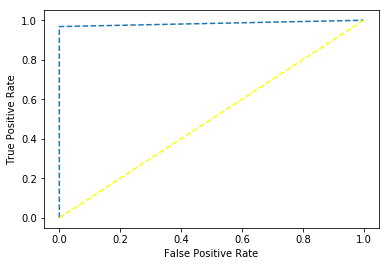

In [511]:
print('the ROC plot for training set is:')
from matplotlib import pyplot
pyplot.plot(fpr, tpr, linestyle='--')
pyplot.plot([0, 1], [0, 1], color='yellow', linestyle='--')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

confusion matrix for test set is:
[[15608    17]
 [  123   252]]
the auc for test set is: 0.8354560000000001
the roc curve for test set is:


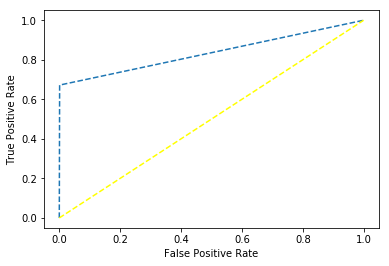

the test error is: 0.008750000000000036


In [514]:
Y_pred_test=rf.predict(X_test_aps)
print("confusion matrix for test set is:")
print(confusion_matrix(Y_test_aps,Y_pred_test))
fpr, tpr, thresholds = metrics.roc_curve(Y_test_aps,Y_pred_test)
roc_auc = metrics.auc(fpr, tpr)
print("the auc for test set is:",roc_auc)
print("the roc curve for test set is:")
pyplot.plot(fpr, tpr, linestyle='--')
pyplot.plot([0, 1], [0, 1], color='yellow', linestyle='--')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

print("the test error is:",1-(accuracy_score(Y_test_aps,Y_pred_test)))

We see that there are 140 misclassifications out of 16000 for the test set.

In [519]:
print("the Out Of Bag Error estimate is: ",1-(rf.oob_score_))

the Out Of Bag Error estimate is:  0.008349999999999969


We see that the OOB error estimate is close to the test error, although it is a bit lower than it. This tells us that OOB is a better way to evaluate our models than the training error, which overfits and gives a very small error or high accuracy each bagged tree makes use of around two-third of the train set observations.
OOB is comparable to test error because of the train set being tested against trees which did not contain the point.

### Solution to 2(d) as below:

We can add a parameter 'class_weight="balanced"' to our RandomForestClassifier() function to deal with class imabalances. It weighs classes inversely proportional to the frequency in which they appear in the data set.

the confusion matrix for training set is :
[[59000     0]
 [   64   936]]
the train error is: 0.0010666666666666602
the auc for training set is: 0.968
the ROC plot for training set is:


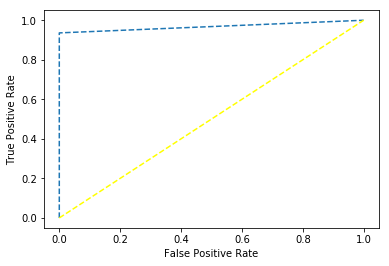

In [520]:
rf_bal = RandomForestClassifier(oob_score=True,class_weight="balanced",random_state=0).fit(X_train_aps,Y_train_aps)
Y_train_pred_bal=rf_bal.predict(X_train_aps)
print("the confusion matrix for training set is :")
conf=confusion_matrix(Y_train_aps,Y_train_pred_bal)
print(conf)

print("the train error is:",1-(accuracy_score(Y_train_aps,Y_train_pred_bal)) )

fpr, tpr, thresholds = metrics.roc_curve(Y_train_aps,Y_train_pred_bal)
roc_auc = metrics.auc(fpr, tpr)
print("the auc for training set is:",roc_auc)

print('the ROC plot for training set is:')
from matplotlib import pyplot
pyplot.plot(fpr, tpr, linestyle='--')
pyplot.plot([0, 1], [0, 1], color='yellow', linestyle='--')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

We see that there are 64 misclassification out of 60000 for the train set.

confusion matrix for test set is:
[[15603    22]
 [  189   186]]
the auc for test set is: 0.747296
the roc curve for test set is:


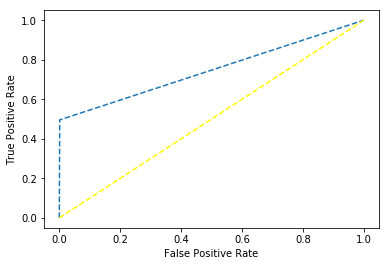

the test error is: 0.013187500000000019


In [522]:
Y_pred_test_bal=rf_bal.predict(X_test_aps)
print("confusion matrix for test set is:")
print(confusion_matrix(Y_test_aps,Y_pred_test_bal))
fpr, tpr, thresholds = metrics.roc_curve(Y_test_aps,Y_pred_test_bal)
roc_auc = metrics.auc(fpr, tpr)
print("the auc for test set is:",roc_auc)
print("the roc curve for test set is:")

pyplot.plot(fpr, tpr, linestyle='--')
pyplot.plot([0, 1], [0, 1], color='yellow', linestyle='--')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.show()

print("the test error is:",1-(accuracy_score(Y_test_aps,Y_pred_test_bal)) )

We see that there are 211 misclassifications out of 16000 for the test set.

In [524]:
print("the Out Of Bag Error estimate is: ",1-(rf_bal.oob_score_))

the Out Of Bag Error estimate is:  0.010399999999999965


We see that the OOB error and test errors are still comparable unlike the train error, although the OOB error estimate is lower than the test error.

While comparing with 2(c), we see that the train error in this part increases since the dataset is now not heavile imbalanced as before. The AUC for the train set for the balanced dataset also decreases as compared to the imbalanced one.


While comparing with 2(c),we see that the test error increases here, as the model is no longer being trained on heavile imbalanced data , which often gives very high accuracy due to the rarity of the positive class. The AUC decreases here when compared to 2(c).

The OOB error estimate here is higher than the OOB with imbalanced data because of the similar reasons as above.

### Solution to 2(e) as below:

In [535]:
aps_train.to_csv('/Users/sharadsharma/Downloads/Homework4Data/aps_train.csv')

#6.8.3
(a)(iv)is correct because as s increases from 0, the restriction on the coefficients reduces and the model tends to become more flexible. Due to this fact, there will be a steady decrease in the training RSS.

(b)(ii) is correct because as s increases from 0, the restriction on the coefficients reduces and the model tends to become more flexible. This causes at first a decrease in the test RSS before increasing again after that in a typical U shape.

(c)(iii)is correct because as s increases from 0, the restriction on the coefficients reduces and the model tends to become more flexible. Due to the increase in flexibility, there is a steady increase in variance.

(d)(iv)is correct because as s increases from 0, the restriction on the coefficients reduces and the model tends to become more flexible. Due to the increase in flexibility, there is a steady increase in variance and a steady decrease in bias.

(e)(v) is correct here because the irreducible error is independent of the features and hence independent of s as well.

In [536]:
aps_train['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

In [537]:
aps_test['class'].value_counts()

neg    15625
pos      375
Name: class, dtype: int64

In [561]:
from imblearn.over_sampling import SMOTE

In [589]:
sm = SMOTE(random_state=2,ratio=0.10)
aps_train_X=aps_train.iloc[:,1:]
aps_train_Y=aps_train.iloc[:,0]
aps_train_X_smote, aps_train_Y_smote = sm.fit_sample(aps_train_X, aps_train_Y)
dt_train_X_smote_df=pd.DataFrame(data=aps_train_X_smote,columns=aps_train_X.columns)
dt_train_Y_smote_df=pd.DataFrame({'class':aps_train_Y_smote})
dt_train_smote=pd.concat([dt_train_Y_smote_df,dt_train_X_smote_df],axis=1)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [590]:
dt_train_smote['class'].value_counts()

neg    59000
pos     5900
Name: class, dtype: int64